Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "" # put your full name here
COLLABORATORS = [] # list anyone you collaborated with on this workbook

---

## Lab 5: Least Squares Regression (Single-Variable)

Welcome to your fifth lab of the semester!<br>

This lab aims to get you started with linear regression in Python.

By the end of this lab you should be able to:
* Calculate the coefficients of a single-variable least squares regression problem
* Build a model and predict estimates for a variable of interest
* Evaluate model performance

### Setup

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### Introduction and Data Source

In this lab, we'll be applying least squares regression to data from the [California Department of Transportation (CalTrans)](https://data.ca.gov/). This dataset is no longer publicly available, so we have downloaded it for you and put it in the `data` folder.  

**Question 1 (1pt):** Load in the .csv file in the "data" folder and save it to a dataframe `df`.

In [3]:
# YOUR CODE HERE
# df = ...
# df

In [4]:
df = pd.read_csv('data/caltrans_hoursofdelay_2017.csv')
df

,Route Number,Route Suffix,County,Vehicle Hours of Delay (VHD) Rank,Annual Vehicle Hours of Delay (VHD) at 35 miles per hour (mph),Annual Vehicle Miles Traveled (VMT),Number of Incidents,Incidents/ Day,Incidents/ million VMT
0,99,NaN,BUT,1,7372,59973595,834,2.28,13.91
1,50,NaN,ED,2,34070,614933130,1741,4.77,2.83
2,80,NaN,NEV,3,36132,522576590,1781,4.88,3.41
3,65,NaN,PLA,4,149952,311279662,1029,2.82,3.31
4,80,NaN,PLA,5,210066,1430481526,4727,12.95,3.30
...,...,...,...,...,...,...,...,...,...
175,142,NaN,ORA,176,-,149778734,-,0.00,0.00
176,241,NaN,ORA,177,135890,517167727,330,0.90,0.64
177,261,NaN,ORA,178,3499,52929771,71,0.19,1.34
178,405,NaN,ORA,179,2893120,2298279670,7242,19.84,3.15


This dataset reports freeway congestion in California, organized by county and route. For this exercise, we'll be looking specifically at the Annual Vehicle Miles Traveled (VMT) field, which represents the total number of miles traveled per vehicle on that route in that county, and the Incidents/ Day field, which represents the average number of traffic incidents per day for that route and county in 2017.

Let's create a model to predict the number of Incidents/Day (i.e., the target variable) as a function of annual VMT (i.e., the independent variable). 

**Question 2 (2pts):** To start off with, create a scatter plot with Annual VMT on the x-axis and Incidents/Day on the y-axis. What can you say about the general relationship between these two variables?

*Note*: instead of typing out a long column name everytime you need to use it, you can create a variable that contains that column name as a string. For instance, rather than typing out `df["Annual Vehicle Miles Traveled (VMT)"]`, you can define a variable `vmt`:
```python
vmt = "Annual Vehicle Miles Traveled (VMT)"
df[vmt]
```
You can also just re-name the column names.

We recommend that you use one of these methods, as we'll be using these columns for the rest of the assignment. 

In [5]:
# YOUR CODE HERE

sns.scatterplot(...)
plt.title(...)
plt.show()

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: If using all scalar values, you must pass an index

*Your observations here*

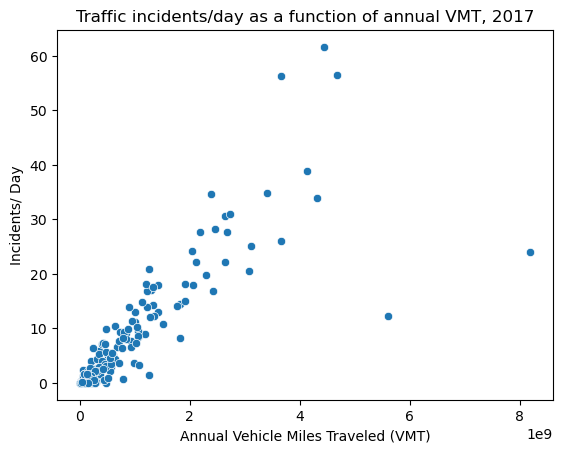

In [6]:
# Possible solution
vmt = "Annual Vehicle Miles Traveled (VMT)"
i_day = "Incidents/ Day"

sns.scatterplot(x = df[vmt], y = df[i_day])
plt.title("Traffic incidents/day as a function of annual VMT, 2017")
plt.show()

*There seems to be a general linear relationship between annual VMT and incidents/day (with 2 notable outliers at high VMT), where an increase in VMT leads to an increase in incidents/day.*

### Estimate the coefficients

In lecture we went over formulas to solve for the coefficients $\beta_0$ and $\beta_1$ in a single-variable least squares regression problem:

$y_i = \beta_0 + \beta_1 x_i + e_i$.

Those formulas are:

$
\hat{\beta}_0  =\bar{y} - \hat{\beta}_1\bar{x}\\
\hat{\beta}_1 = \frac{ \sum_{i=1}^n(x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^n (x_i-\bar{x})^2}
$


**Question 3 (1 pt):** Write a function that returns the estimated $\beta_0$ and $\beta_1$ using the summation formulas above, taking the vectors of all $x$ and $y$ observations as input.

In [7]:
# def get_betas(x,y):
#     # YOUR CODE HERE
#     return ...

In [8]:
# Possible solution
def get_betas(x,y):
    xbar = x.mean()
    ybar = y.mean()
    beta_1 = np.sum((x-xbar)*(y-ybar))/np.sum((x-xbar)**2)
    beta_0 = ybar - beta_1*xbar
    return(beta_0,beta_1)

**Question 4 (1 pt):** Use your function to estimate $\beta_0$ and $\beta_1$ for the independent and response variables of interest in the Caltrans data you loaded.  

In [9]:
(b0, b1) = ... # YOUR CODE HERE
print('Beta values are', b0, 'and', b1)

TypeError: cannot unpack non-iterable ellipsis object

In [10]:
### SOLUTION
(b0,b1) = get_betas(df[vmt],df[i_day])
print('Beta values are', b0, 'and', b1)

Beta values are 1.1214376813588887 and 7.72163871543741e-09


### Predict the target (dependent) variable

**Question 5 (1 pt):** Use your estimated coefficients to predict Incidents/Day ($\hat{y}$) for every observation of annual VMT ($x_i$).

In [11]:
y_hat = ... # YOUR CODE HERE

In [12]:
# SOLUTION
y_hat = b0 + b1*df[vmt]

In [13]:
assert len(y_hat) == len(df) # Your code should return a predicted value of y for every observation in the dataset

**Question 6 (1 pt):** Output a plot that overlays your regression line on a scatterplot of VMT vs. incidents per day. 

In [14]:
# YOUR CODE HERE
plt.scatter(...)
plt.plot(...)
plt.title(...)
plt.xlabel(...)
plt.ylabel(...)
plt.legend()
plt.show()

TypeError: scatter() missing 1 required positional argument: 'y'

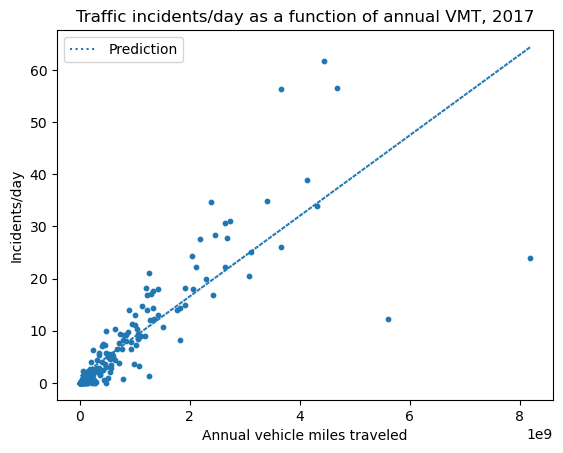

In [15]:
# solution
plt.scatter(df[vmt].values, df[i_day].values, s = 10)
plt.plot(df[vmt].values,y_hat.values, ":", label = "Prediction")
plt.title("Traffic incidents/day as a function of annual VMT, 2017")
plt.xlabel("Annual vehicle miles traveled")
plt.ylabel("Incidents/day")
plt.legend()
plt.show()

### Model estimation and prediction using sckit tools

We can (and will) also estimate coefficients and predict response variables using the Python package scikit-learn. As we move forward in this class, we will be developing more complicated models and using more than one independent variable. The scikit-learn toolbox gives us a way to run regression (and other!) models quickly and efficiently. Let's walk through an example using single-variable regression.

First, we need to set up some new dependencies.

In [16]:
# Install sklearn
! pip install scikit-learn

In [17]:
# Import packages

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

The `scikit-learn` package has a `linear_model` object upon which you can call `LinearRegression()` to generate a linear regression object:

`lm = linear_model.LinearRegression()`

`lm` takes as arguments to its `.fit()` method the arrays $X$ and $y$, where $X$ is a dataframe of independent variables and $y$ is a dataframe of the dependent variable, or our "target" data.

*Note*: The `scikit-learn` functions will only accept $X$ and $y$ as inputs if both dimensions of these arrays' respective shapes are explicitly defined. In other words, the `linear_model` functions will produce errors if either the $X$ or $y$ array has a `shape` of the form `(n,)`, where n is the number of elements in the array. Instead, one-dimensional arrays need to be reformatted to have the shape `(n,1)`. You'll have to get the values from your panda dataframe for $X$ and $y$, and then use the `.reshape()` method to get the right dimensions. Alternatively, `scikit-learn` will also accept an input if it takes the form of a pandas dataframe rather than a pandas series; for example, defining $X$ as `df[['column_name']]` is acceptable in `scikit-learn` syntax, but defining $X$ as `df['column name']` is not.

For example, we would initiate and fit a linear regression model for the CalTrans data as follows:

In [18]:
X = df[[vmt]] # define an array of independent variables
y = df[[i_day]] # define an array (usually one-dimension) of target variables
lm_incidents = linear_model.LinearRegression() # initiate a linear regression object
fit_incidents = lm_incidents.fit(X,y) # fit the linear regression object to your X and y data

In the code above, the `.fit()` method estimates the coefficients for our linear model. We can access the coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$ as follows:

In [19]:
beta0_hat =  fit_incidents.intercept_
beta1_hat = fit_incidents.coef_
print('beta0_hat:', beta0_hat)
print('beta1_hat:', beta1_hat) # If we had more than one x term, .coef_ would return more than one coefficient, i.e., beta1_hat, beta2_hat...

beta0_hat: [1.12143768]
beta1_hat: [[7.72163872e-09]]


**Question 7 (1 pt):** How do the estimates of $\hat{\beta}_0$ and $\hat{\beta}_1$ that we found using the `scikit-learn` tools compare to those we found using the linear regression equations?

*YOUR ANSWER HERE*

*They are the same.*

We can also use `scikit-learn` to predict the target variable. The `linear_model` object we initated and fit for the CalTrans data has a `.predict()` method, which takes in a matrix $X$ and returns a list of $\hat{y}$ values. 

In [20]:
y_pred = fit_incidents.predict(X)

Check that the values for y_pred equal the values for y_hat, at least the the 8th decimal place.

In [21]:
assert (np.round(y_pred,8) == np.round(y_hat.values.reshape(-1,1),8)).all() 

### Evaluate model performance

**Question 8 (2 pts):** Using the `y_pred` predicted values you developed above, calculate the error term $e_i$ (aka, the residual) for each pair of predictions and observations. The result for `error` should be a 1-dimensional array that has the same length as our number of observations. Then, create a scatter plot with the residual on the y-axis and Annual VMT on the x-axis. Overlay on your plot a dotted horizontal line that crosses the y-axis at zero.

In [22]:
# #YOUR CODE HERE

error = ... 

plt.scatter(...)
plt.axline(...)
plt.title(...)
plt.xlabel(...)
plt.ylabel(...)
plt.show()

TypeError: scatter() missing 1 required positional argument: 'y'

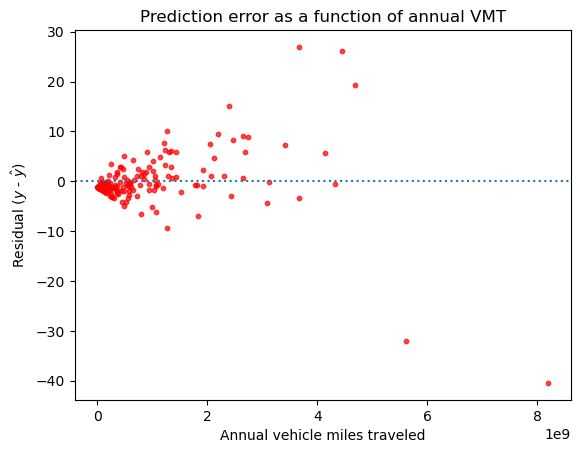

In [31]:
error = df[i_day] - y_pred.reshape((180,))

plt.scatter(df[vmt],error,color='r', s=10, alpha=0.7)
plt.axhline(linestyle=':')
plt.title("Prediction error as a function of annual VMT")
plt.xlabel("Annual vehicle miles traveled")
plt.ylabel("Residual ($y$ - $\hat{y}$)")
plt.show()

**Question 9 (1pt):** Visually inspect your residual plot. Are there any regions of the x-domain in which your model seems to be systematically over- or under-estimating the response variable? Is this a sign of variance or bias in your model, and what is one strategy for correcting this issue?

*YOUR ANSWER HERE*

*Visually, it appears that our model is doing the best job (i.e., residuals are evenly distributed around zero) when annual VMT is low. As VMT increases above ~2e9, our model appears to consistently underestimate incidents per day. At very high VMT (>5e9), we don't really know whether our model is overestimating incidents per day because we only have two data points in that region of the domain. Systematic over- or under-estimation is a sign of bias, which can be corrected by increasing the flexibility of the model (e.g., by adding additional x terms).*

**Question 10 (1 pt)** Calculate the mean square error (MSE) for your model using the formula below. Your result should be a single, non-negative value.

$
MSE  =\frac{1}{n} \sum_{i=1}^n e_i^2
$

*Hint:* Use the `error` array you created in Question 8.

In [ ]:
# YOUR CODE HERE
MSE = ...
print(MSE)

In [ ]:
# Solution
MSE = (error**2).mean()
print(MSE)

Alternatively, you can use scikit-learn built-in functions to calculate MSE.

In [ ]:
MSE = mean_squared_error(df[i_day], y_hat)
MSE

# Hooray, you're done! 

Please remember to submit your lab work, after clicking Kernel -> Restart & Run All, in .pdf and .ipynb format on bCourses.